# Generalizing linear regression- Perceptrons

In part-1 of the session we developed a model for predicting house prices using linear regression. As the name sugeests, the model aims to find a linear fit that best describes the training data. However, not **all relationships are linear**.
Note that for a *nonlinear data*, it does not mattter how much training data we get linear regression is nable to clearly capture the dynamics of the system, as demonstrated in the following example:

### Example 1. Linear model for nonliear data

Using linear regression to fit nonlinear data described by the function $$y =  \sin \Big(\frac{1}{x}\Big).$$

In [129]:
import numpy as np

 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

%pylab

plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings("ignore") 

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'y')

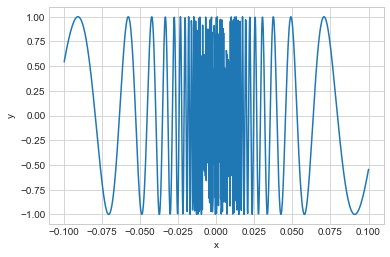

In [130]:
## defining the f_x as an inline function using the built-in function- lambda
#f_x = lambda x:np.sin(np.pi*x)*np.exp(-2.*np.pi*x)   
f_x = lambda x:np.sin(1./x)
# plotting the function 
Xs = np.linspace(-0.1,0.1,1001)
Ys = f_x(Xs) 

fig1 = plt.figure()
fig1.clf()
ax1 = fig1.add_subplot(111)
ax1.plot(Xs,Ys)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

###### Note that the function $f(x)$ is not known to us, in fact learning the function is our goal.

What is known to us is a snippet of the data as shown in the figure below.

<img src="snippet_2.jpg" />

In such a circumstance it is quite probable that linear regression might result in *satisfactory* performance until it encounters a different chunk of the dataset. 

We now examine the performance of the linear model over a larger dataset ----------->

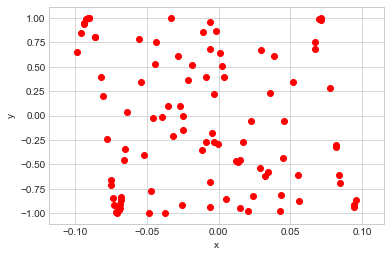

In [131]:
# set the number of training data points
N_train =  101
N_test = 21

X_train = np.random.uniform(low=-0.1, high=0.1, size=(N_train,1))
Y_train = f_x(X_train)

X_test = np.random.uniform(low=-0.1, high=0.1, size=(N_test,1))
Y_test = f_x(X_test)


fig1 = plt.figure()
fig1.clf()
ax1 = fig1.add_subplot(111)
ax1.scatter(X_train,Y_train,color='r',marker='o')
ax1.set_xlabel('x');
ax1.set_ylabel('y');

### Using linear regression to fit this data

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

linear = LinearRegression()
linear.fit(X_train, Y_train)

Y_pred_train = linear.predict(X_train)
Y_pred_test = linear.predict(X_test)

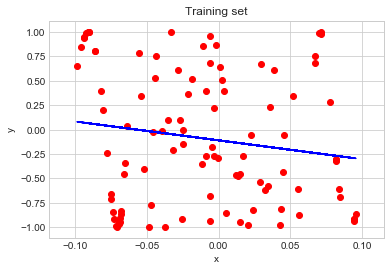

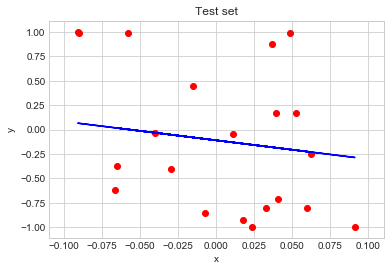

In [133]:
fig2 = plt.figure()
fig2.clf()
ax2 = fig2.add_subplot(111)
ax2.scatter(X_train,Y_train,color='r',marker='o')
ax2.plot(X_train,Y_pred_train,color='b')
ax2.set_xlabel('x');
ax2.set_ylabel('y');
ax2.set_title('Training set');

fig3= plt.figure()
fig3.clf()
ax3 = fig3.add_subplot(111)
ax3.scatter(X_test,Y_test,color='r',marker='o')
ax3.plot(X_test,Y_pred_test,color='b')
ax3.set_xlabel('x');
ax3.set_ylabel('y');
ax3.set_title('Test set');

### Model performance irrelevant of the data size

To further stress on the significance of model selection, we use test the performance of the linear model for successively using larger trainig sets. 

A common practise, to increase the accuracy of models (mesaured through metrics like mean squred error, absolute error,..) is to train the model on larger train data sets. 

In [134]:
def model_performance(f_x,train_sizes,X_test,Y_test,linear):
    mse_list = []
    for N_train in train_sizes:
        X_train = np.random.uniform(low=-0.1, high=0.1, size=(N_train,1))
        Y_train = f_x(X_train)
        linear.fit(X_train, Y_train)
        
        Y_pred_test = linear.predict(X_test)
        mse_list.append(mse(Y_test,Y_pred_test))
    return mse_list

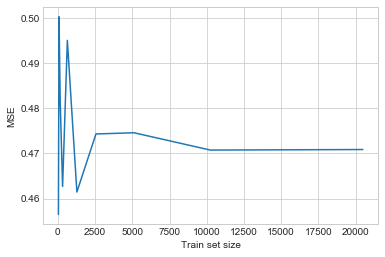

In [135]:
train_sizes = [40,80,160,320,640,1280,2560,5120,10240,20480]

mse_list = model_performance(f_x,train_sizes,X_test,Y_test,linear)

fig4= plt.figure()
fig4.clf()
ax4 = fig4.add_subplot(111)
ax4.plot(train_sizes, mse_list)
ax4.set_xlabel('Train set size');
ax4.set_ylabel('MSE');

## Perceptrons improving linear regression 

### History 
To enhance the capability of linear models in learning nonlinear distribution, *Frank Rosenblatt* working at the Cornell Aeronautical Laboratory in 1957 proposed a family of artificial neural networks (ANN) for pattern classification and information storage. The algorith came to known as **perceptron**. The perceptron in its formulation was argued to be a simplified model of a biological *neuron.* 

Since the very beginning, perceptron have attracted a lot of controversy, with Rosenblatt himself reporting the perceptron to be *"the embryo of an electronic computer that [the Navy] expects will be able to walk, talk, see, write, reproduce itself and be conscious of its existence."*

Although very promising, early researcher were quick in discovering that the perceptron could not be trained to recognise many classes of patterns. In their book titled *Perceptron*, Minsky and Papert showed that single layer perceptron are only capapble of learning linearly separable patterns and that it is impossible to learn an XOR function.

Very soon perceptron became history, until it was realized that *multilayer perceptron* or  *feedforward neural networks* had greater ability in learning patterns than a single layer perceptron. It was shown that a multilayer perceptron could very well learn a XOR function. Still the widely cited work of Minsky and Papert resulted in decline of interest and funcding in research on neural networks, with the text being  reprinted in 1987 as *"Perceptrons - Expanded Edition"* where some errors in the original text were demonstrated and corrected.

### Formulation 